## User Experience - DrBalcony

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
user_experience = pd.read_csv(r"C:\Users\Pc\Desktop\DrBalcony_Project\simulated_data.csv")

In [80]:
user_experience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      1000 non-null   int64  
 1   session_date                 1000 non-null   object 
 2   session_duration_in_minutes  1000 non-null   int64  
 3   features_used                1000 non-null   object 
 4   user_feedback_score          1000 non-null   float64
 5   user_location                1000 non-null   object 
 6   app_load_time_in_seconds     1000 non-null   int64  
 7   error_occurrences            1000 non-null   int64  
 8   regulatory_focus             1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [81]:
user_experience['session_date'] = pd.to_datetime(user_experience['session_date'])

In [82]:
user_experience.head()

,user_id,session_date,session_duration_in_minutes,features_used,user_feedback_score,user_location,app_load_time_in_seconds,error_occurrences,regulatory_focus
0,1,2024-08-15,33,Inspection Report,4.7,San Diego,1,1,SB326
1,2,2024-02-20,40,Compliance Check,4.6,Los Angeles,1,1,Section 604
2,3,2024-10-31,16,Design Consultation,4.4,Sacramento,1,1,SB326
3,4,2024-09-05,23,Design Consultation,4.0,Los Angeles,1,1,SB326
4,5,2024-12-05,38,Design Consultation,4.2,Santa Ana,1,0,SB721


In [83]:
# Calculate average session duration
avg_session_duration = user_experience['session_duration_in_minutes'].mean()
avg_session_duration

27.498

In [84]:
# Calculate average load time
avg_load_time = user_experience['app_load_time_in_seconds'].mean()
avg_load_time

1.391

In [85]:
# Distribution of error occurrences
error_distribution = user_experience['error_occurrences'].value_counts(normalize=True)
error_distribution.reset_index()

,error_occurrences,proportion
0,0,0.779
1,1,0.173
2,2,0.048


In [86]:
# Calculate average feedback score
avg_feedback_score = user_experience['user_feedback_score'].mean()
avg_feedback_score

4.2631000000000006

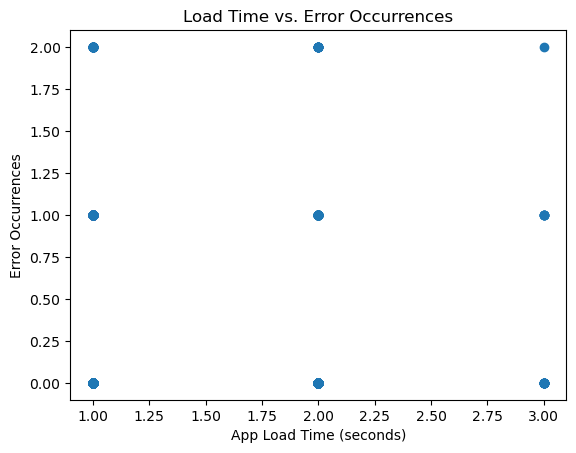

In [87]:
# Generate scatter plot
plt.scatter(user_experience['app_load_time_in_seconds'], user_experience['error_occurrences'])
plt.title('Load Time vs. Error Occurrences')
plt.xlabel('App Load Time (seconds)')
plt.ylabel('Error Occurrences')
plt.show()


In [88]:
# Calculate correlation
load_error_correlation = user_experience['app_load_time_in_seconds'].corr(user_experience['error_occurrences'])
load_error_correlation

-0.035679904455476544

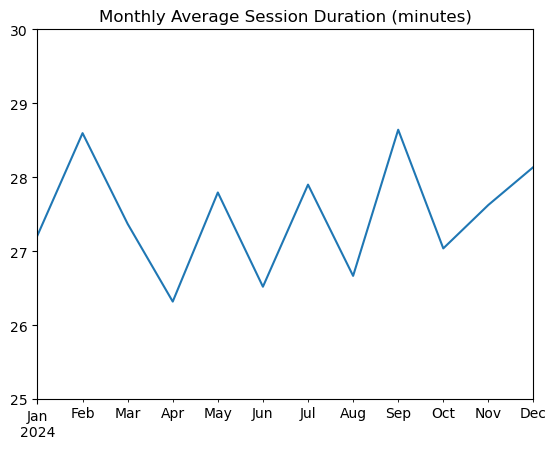

In [89]:
# Calculate monthly average session duration
monthly_avg_duration = user_experience.set_index('session_date').resample('M')['session_duration_in_minutes'].mean()
monthly_avg_duration.plot(title='Monthly Average Session Duration (minutes)')
plt.ylim(25, 30)
plt.xlabel('')
plt.ylabel('')
plt.show();

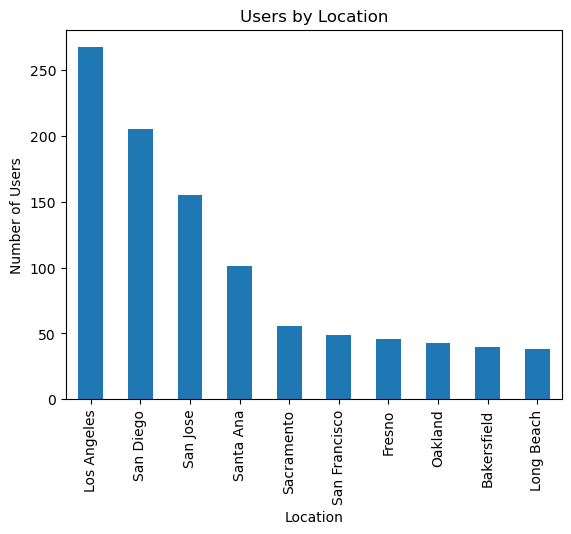

In [90]:
# Plot users by location
location_distribution = user_experience['user_location'].value_counts()
location_distribution.plot(kind='bar', title='Users by Location')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.show()

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


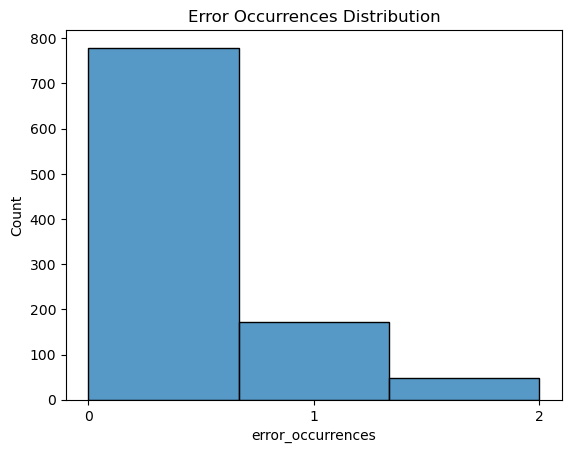

In [91]:
# Histogram for error occurrences
sns.histplot(user_experience['error_occurrences'], bins=3, kde=False)
plt.title('Error Occurrences Distribution')
plt.xticks([0,1,2])
plt.show()

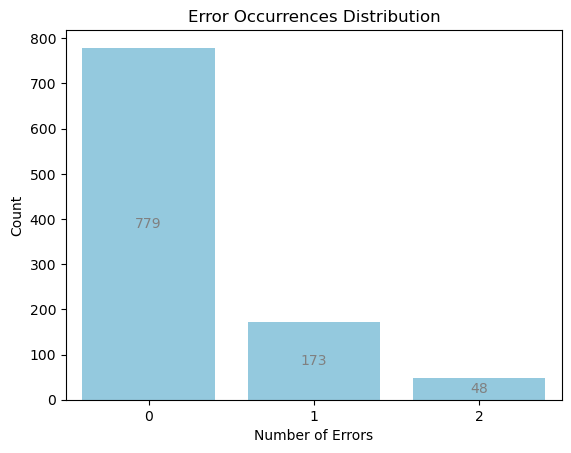

In [92]:
ax = sns.countplot(x='error_occurrences', data=user_experience, color='skyblue')
plt.title('Error Occurrences Distribution')
plt.xlabel('Number of Errors')
plt.ylabel('Count')

# Add data labels inside the bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convert to integer
        (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Position inside the bar
        ha='center', va='center', fontsize=10, color='gray'  # Centered
    )
plt.show()

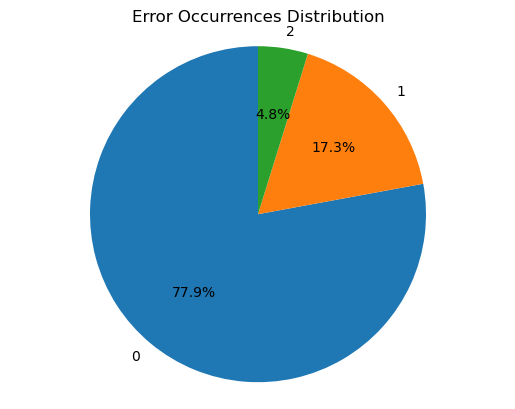

In [93]:
# Count the occurrences of each error value
error_counts = user_experience['error_occurrences'].value_counts().sort_index()

# Create a pie chart
plt.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Error Occurrences Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

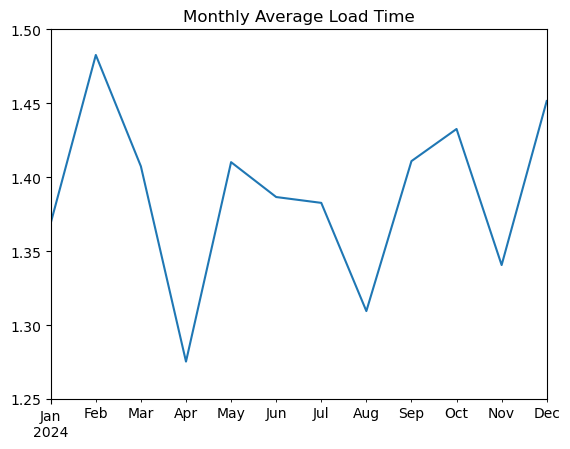

In [94]:
# Line chart for load times over time

monthly_avg_load_times = user_experience.set_index('session_date').resample('M')['app_load_time_in_seconds'].mean()
monthly_avg_load_times.plot(title='Monthly Average Load Time (seconds)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(1.25, 1.5)
plt.title('Monthly Average Load Time')
plt.show()

In [95]:
# Split features into separate columns
features_df = user_experience['features_used'].str.get_dummies(sep=', ')

# Join the features DataFrame with the original DataFrame
combined_df = user_experience.join(features_df)

# Select only numeric columns for the groupby sum operation
numeric_columns = combined_df.select_dtypes(include='number').columns

# Group by regulatory focus and sum only the numeric columns
feature_regulation_summary = combined_df.groupby('regulatory_focus')[numeric_columns].mean()

# Display the summary
feature_regulation_summary

,user_id,session_duration_in_minutes,user_feedback_score,app_load_time_in_seconds,error_occurrences,Compliance Check,Design Consultation,Inspection Report,Other
regulatory_focus,,,,,,,,,
SB326,501.300000,26.534375,4.259688,1.403125,0.237500,0.290625,0.290625,0.293750,0.125000
SB721,491.714689,28.163842,4.265537,1.333333,0.262712,0.271186,0.324859,0.245763,0.158192
Section 604,509.254601,27.720859,4.263804,1.441718,0.306748,0.312883,0.297546,0.260736,0.128834


In [100]:
# Create a pivot table for feature usage by user location
pivot_table = pd.pivot_table(user_experience.join(features_df), index='user_location', values=features_df.columns, aggfunc='sum')

# Calculate the total for each column
total_row = pivot_table.sum().to_frame().T
total_row.index = ['Total']

# Concatenate the total row to the pivot table
pivot_table_with_total = pd.concat([pivot_table, total_row])

# Display the pivot table with the total row
pivot_table_with_total

,Compliance Check,Design Consultation,Inspection Report,Other
Bakersfield,9,14,12,5
Fresno,16,9,17,4
Long Beach,15,11,6,6
Los Angeles,76,84,62,45
Oakland,9,16,13,5
Sacramento,20,20,10,6
San Diego,60,60,57,28
San Francisco,12,12,18,7
San Jose,45,49,42,19
Santa Ana,29,30,29,13


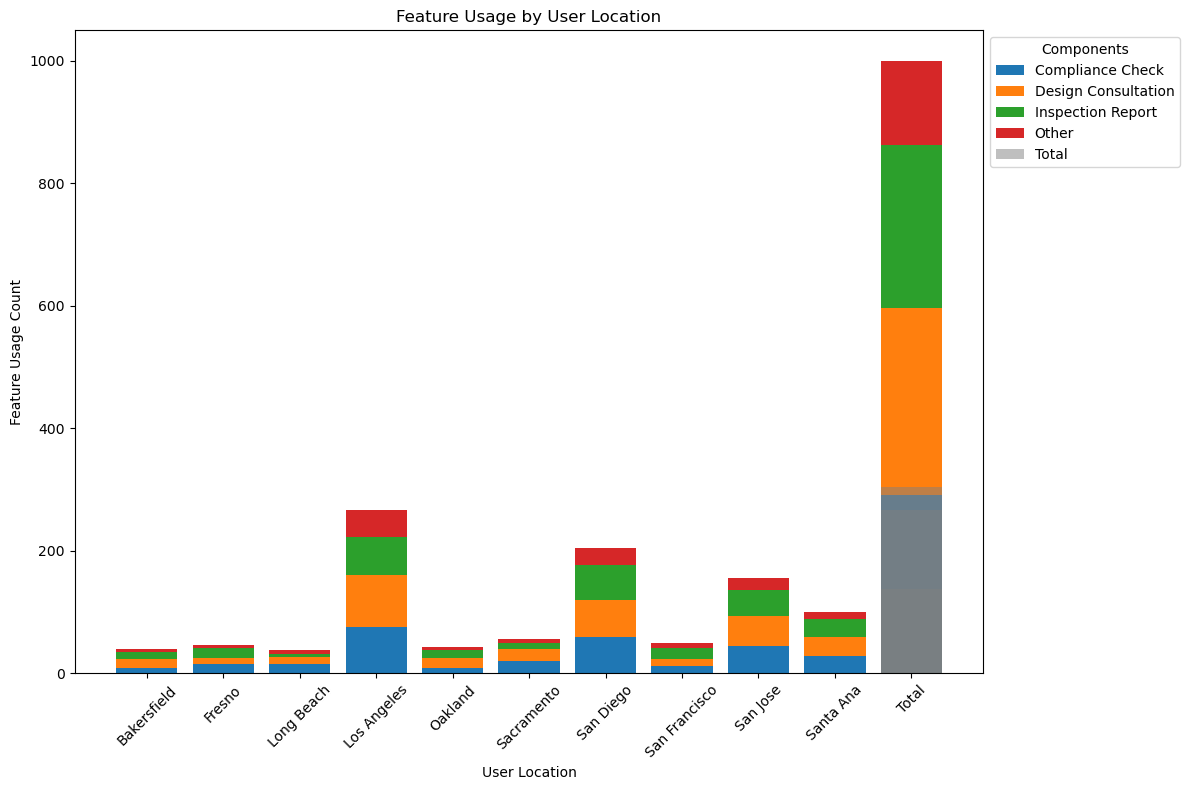

In [101]:
# Assuming 'pivot_table_with_total' is your DataFrame with feature usage by location
features = pivot_table_with_total.columns
locations = pivot_table_with_total.index

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the bottom variable to handle stacking
bottom = [0] * len(locations)

# Plot each feature as a stacked layer
for feature in features:
    ax.bar(locations, pivot_table_with_total[feature], label=feature, bottom=bottom)
    # Update the bottom to add the current feature's values for the next layer
    bottom += pivot_table_with_total[feature]

# Add a Title and Labels
plt.title('Feature Usage by User Location')
ax.set_xlabel('User Location')
ax.set_ylabel('Feature Usage Count')

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish different features
ax.legend(title='Features Used')

# Ensure the total row is represented differently
total_bar = ax.bar(locations[-1], pivot_table_with_total.iloc[-1], label='Total', color='grey', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Components')

# Display the plot
plt.tight_layout()
plt.show()

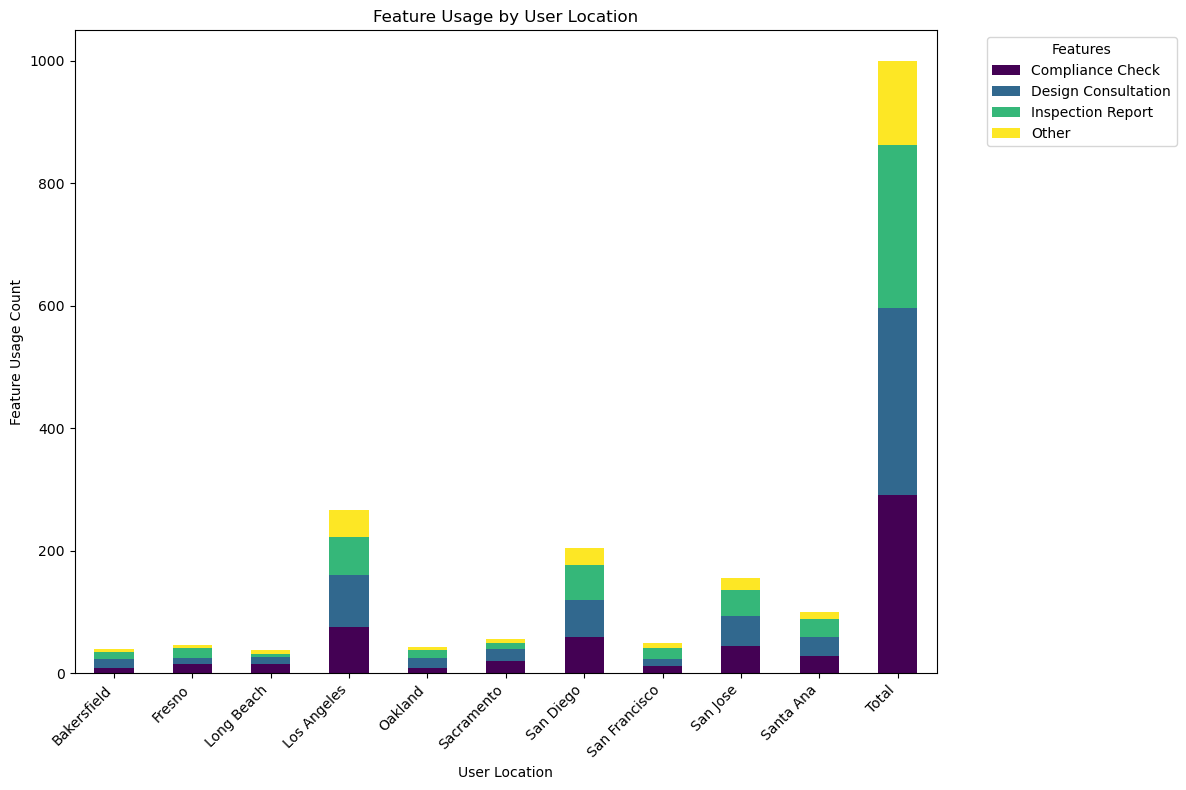

In [102]:
# Plot a stacked bar chart
pivot_table_with_total.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Set title and labels
plt.title('Feature Usage by User Location')
plt.xlabel('User Location')
plt.ylabel('Feature Usage Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the legend
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

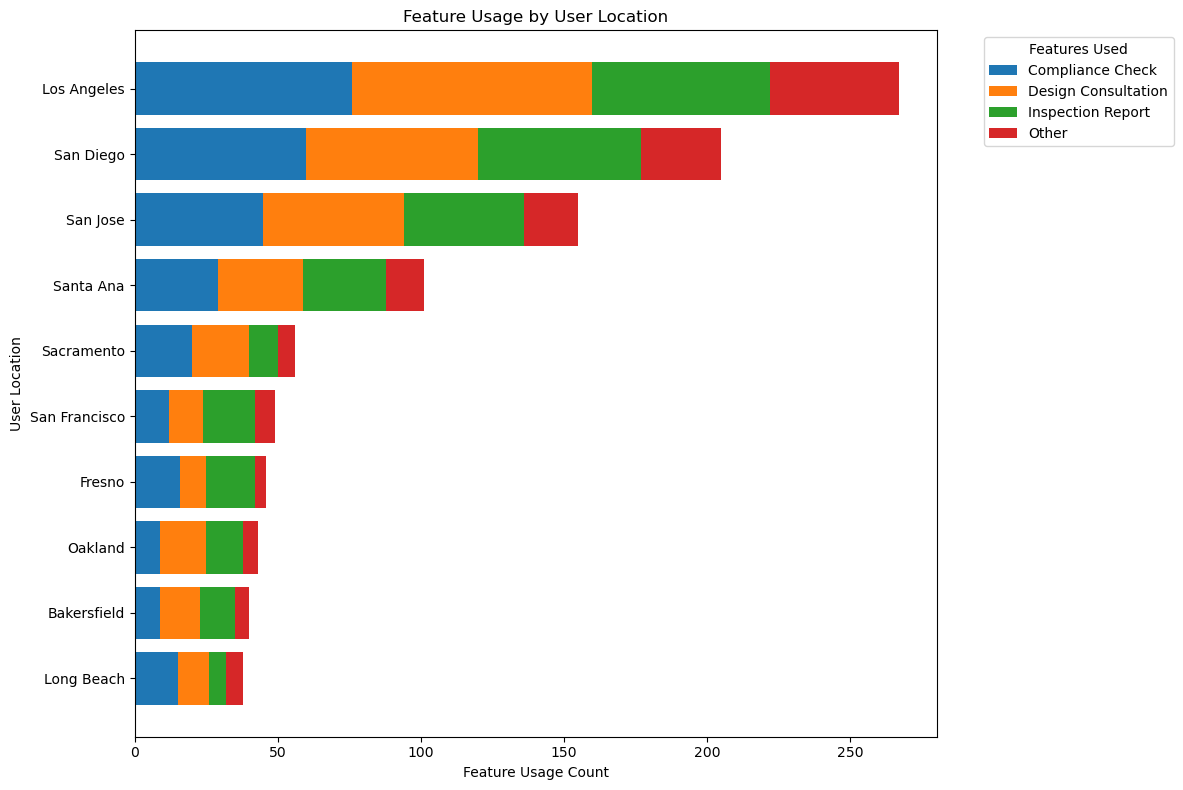

In [105]:
import matplotlib.pyplot as plt

# Assuming 'pivot_table_with_total' is your DataFrame with feature usage by location

# Calculate total usage for sorting purposes
pivot_table_with_total['Total'] = pivot_table_with_total.sum(axis=1)

# Sort the pivot table by the 'Total' row in descending order, excluding the original 'Total' index if present
sorted_pivot_table = pivot_table_with_total.sort_values(by='Total', ascending=True).drop('Total')

# Extract features and locations for plotting
features = sorted_pivot_table.columns[:-1]  # Exclude 'Total' from features since it's used for sorting
locations = sorted_pivot_table.index

# Create a horizontal stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the left variable to handle stacking
left = [0] * len(locations)

# Plot each feature as a stacked layer
for feature in features:
    ax.barh(locations, sorted_pivot_table[feature], label=feature, left=left)
    # Update the left to add the current feature's values for the next layer
    left += sorted_pivot_table[feature]

# Add a Title and Labels
plt.title('Feature Usage by User Location')
ax.set_ylabel('User Location')
ax.set_xlabel('Feature Usage Count')

# Add a legend to distinguish different features
ax.legend(title='Features Used', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

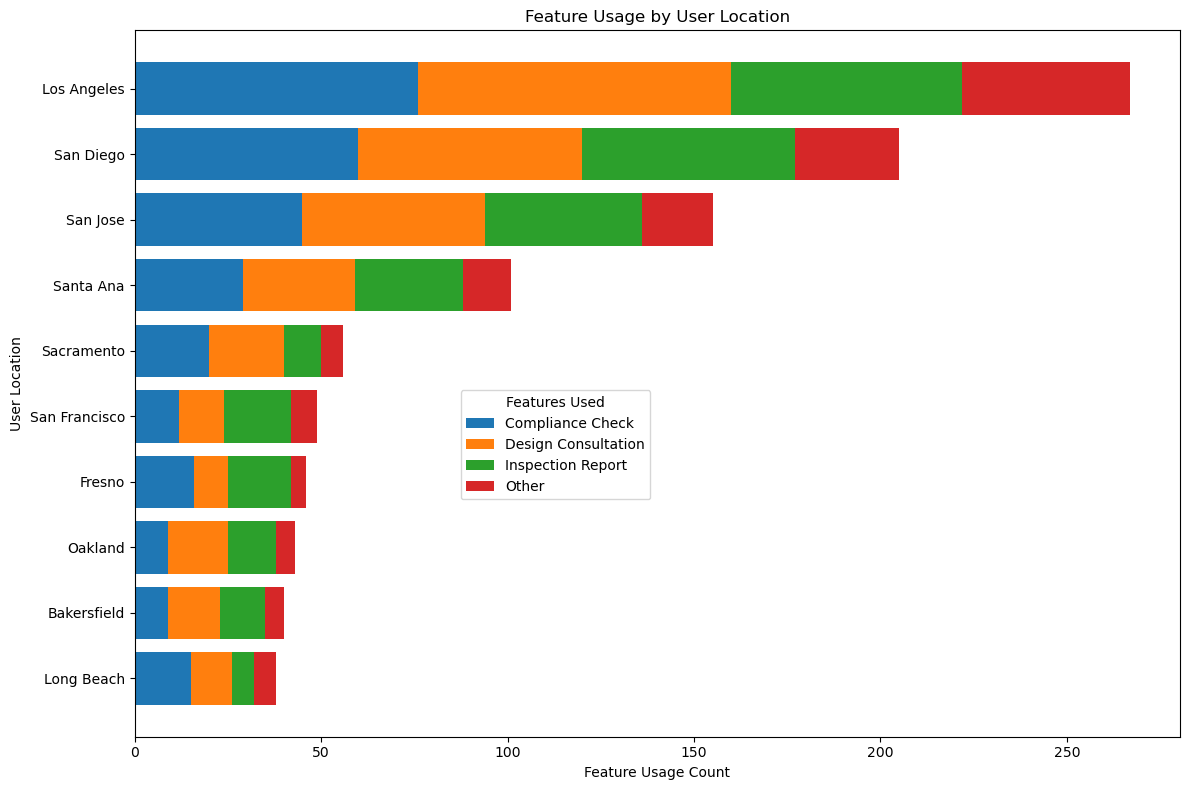

In [109]:
import matplotlib.pyplot as plt

# Assuming 'pivot_table_with_total' is your DataFrame with feature usage by location

# Calculate total usage for sorting purposes
pivot_table_with_total['Total'] = pivot_table_with_total.sum(axis=1)

# Sort the pivot table by the 'Total' row in descending order, excluding the original 'Total' index if present
sorted_pivot_table = pivot_table_with_total.sort_values(by='Total', ascending=True).drop('Total')

# Extract features and locations for plotting
features = sorted_pivot_table.columns[:-1]  # Exclude 'Total' from features since it's used for sorting
locations = sorted_pivot_table.index

# Create a horizontal stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the left variable to handle stacking
left = [0] * len(locations)

# Plot each feature as a stacked layer
for feature in features:
    ax.barh(locations, sorted_pivot_table[feature], label=feature, left=left)
    # Update the left to add the current feature's values for the next layer
    left += sorted_pivot_table[feature]

# Add a Title and Labels
plt.title('Feature Usage by User Location')
ax.set_ylabel('User Location')
ax.set_xlabel('Feature Usage Count')

# Add a legend inside the plot
ax.legend(title='Features Used', loc='upper right', bbox_to_anchor=(0.5, 0.5))

# Display the plot
plt.tight_layout()
plt.show()